Answer the questions

1) Why Data Mining is a misnomer? What is another preferred name?
 
* because we are not search for data itself but we search for knowldege and patterens from a huge amount of data 
* Knowledge discovery from databases (KDD)


2) What is the general knowledge discovery process? What is the difference between a data engineer and data scientist/AI engineer?
 
* general knowledge discovery process is theprocess of identifying valid,meaningful, and understandable patterns in data
*data engineer is responsible for handling and storing data into databases and large-scale processing systems
* the data scientist is responsible for clean and organize and interpret the non-meaningful data using some mathematical and statistical methods also extract knowledge and gain insights from it using some business solutions models
* AI engineers design neural networks, perform computational analysis, create mathematical models and implement algorithms that help machines learn how to do specific tasks and also depoly the final model into real bussiness application or API

3) In data mining, what is the difference between prediction and categorization?
 
* categorization (classification) is to determine the (categorical) labels (discrete value) of objects
* prediction (regression) about predicts the unknown numerical value (continuous value)
 
4) Why data science/machine learning is a bad idea in the context of information security?
 
data science and machine learning can have both positive and negative impacts on information security. However, some possible reasons why data science/machine learning might be considered a bad idea in the context of information security are
* they rely on large amounts of data, which may be sensitive, personal, or confidential
* the algorithms may be biased, inaccurate, or unreliable due to various factors such as poor quality of data, lack of transparency or explainability of models
we have to make sure we are following data privacy guidlines

5) What is CIA principle and how can we use it to access the security/privacy aspect of the AI system/pipelines?

* Confidentiality: How well does the AI system/pipeline protect sensitive data from unauthorized access or disclosure
* Integrity: How well does the AI system/pipeline ensure that data is accurate, consistent, and trustworthy
* Availability: How well does the AI system/pipeline ensure that data is accessible and usable by authorized users when needed.

* we can use it in our AI pipelines to ensure that AI pipeline follow CIA guidlines or to check what is the type of attaks that we are under and fix the situation quickly.
types of attacks:
* Adversarial (front-end) - Confidentiality
* Backdoor/data poisoning (data source) – Integrity
* Training data reconstruction – Confidentiality (privacy)
* Steeling the model - Confidentiality
* Membership inference - Confidentiality (privacy)

________________________________________________________________________________________________________________________________

Problem Formulation:
Define the problem. What is the input? What is the output? What data mining function is required? What could be the challenges? What is the impact? What is an ideal solution?

* using Wish E-Commerce Platform dataset for classification
* input :some features like (price, retail_price, units_sold, uses_ad_boosts) etc
* output: rating
* data mining function is required: classification
* The first challenge: data is not clean and we need a lot of preprocessing on it.
* The second challenge: data set is imblanced (we have a lot 4 rating).
* impact: when you have a new product to be put on wish.com, you can estimate how likely people will like your product, without actually listing out there
* ideal solution: i dont think there is an ideal solution there can always be improvement if we have time to do research about it but i tried my best :(

Experimental protocol:

1) data preprocessing
* explore data
* Drop unnecessary features.
* Check for null values and replace them.
* encode categorical columns


2) build our models and choose best one based on f1 score

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',200)
#pd.set_option('display.max_rows', None)


i merged train and test files so i dont repeat the preprocessing steps but this is not optional since i will later use CountVectorizer and if i did it on each file separately they will end up with different columns :( that is what i noticed and i had to repeat all over again  

In [2]:
df1 = pd.read_csv('train_new.csv',index_col='id')
df2 = pd.read_csv('test_new.csv',index_col='id')
df = pd.concat([df1,df2])
#dropping coloumn we will not need
df= df.drop(['theme','urgency_text','merchant_title','merchant_info_subtitle','currency_buyer','merchant_name','merchant_id','merchant_profile_picture','crawl_month'], axis=1)
df

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,origin_country,merchant_rating_count,merchant_rating,merchant_has_profile_picture
id,,,,,,,,,,,,,,,,,,,,,,,,
272,8.00,7,10000,1,4.0,1670,0,0,0,0,"Summer,soildcolor,Plus Size,Tank,camisole,Tops...",yellow,M,50,Livraison standard,3,0,30,50,NaN,CN,66644,4.137582,1
1515,8.00,7,1000,0,4.0,843,1,1,0,0,"bathing suit,Plus Size,bikini set,sexy swimsui...",black,L,50,Livraison standard,3,0,37,50,NaN,CN,25752,4.256873,0
940,6.00,34,100,0,4.0,10,0,0,0,0,"Summer,Vest,momshirt,Get,summer t-shirts,funny...",white,L,50,Livraison standard,2,0,41,50,NaN,CN,3897,3.928920,0
309,4.67,4,100,1,3.0,82,0,0,0,0,"Summer,Shorts,pants,Beach,Plus Size,beachpant,...",lakeblue,XS,5,Livraison standard,1,0,25,50,NaN,CN,7497,4.079365,0
226,8.00,11,1000,0,4.0,127,0,0,0,0,"Summer,Floral print,women dresses,fashion dres...",apricot,S,50,Livraison standard,3,0,15,50,1.0,CN,173,4.306358,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1166,16.00,14,100,1,NaN,27,0,0,0,0,"mensummertshirt,Summer,Fashion,Men's Fashion,S...",black,M,50,Livraison standard,4,0,35,50,NaN,VE,572,3.367133,0
1416,6.00,17,5000,1,NaN,817,0,0,0,0,"blouse,Summer,Vest,Plus Size,letter print,cute...",blue,XXS,1,Livraison standard,2,0,41,50,NaN,CN,50864,4.079644,1
63,4.83,51,50,1,NaN,1,0,0,0,0,"blouse,Summer,Plus Size,Tops & Blouses,Shirt,W...",white,XS,3,Livraison standard,1,0,39,50,1.0,VE,57,3.824561,0


In [3]:
#counting nulls for each column
df.isna().sum()

price                              0
retail_price                       0
units_sold                         0
uses_ad_boosts                     0
rating                           479
rating_count                       0
badges_count                       0
badge_local_product                0
badge_product_quality              0
badge_fast_shipping                0
tags                               0
product_color                     41
product_variation_size_id         14
product_variation_inventory        0
shipping_option_name               0
shipping_option_price              0
shipping_is_express                0
countries_shipped_to               0
inventory_total                    0
has_urgency_banner              1100
origin_country                    17
merchant_rating_count              0
merchant_rating                    0
merchant_has_profile_picture       0
dtype: int64

In [4]:
#counting unique for each column
print(df.nunique())

price                            127
retail_price                     104
units_sold                        15
uses_ad_boosts                     2
rating                             6
rating_count                     761
badges_count                       4
badge_local_product                2
badge_product_quality              2
badge_fast_shipping                2
tags                            1230
product_color                    101
product_variation_size_id        106
product_variation_inventory       48
shipping_option_name              15
shipping_option_price              8
shipping_is_express                2
countries_shipped_to              94
inventory_total                   10
has_urgency_banner                 1
origin_country                     6
merchant_rating_count            917
merchant_rating                  952
merchant_has_profile_picture       2
dtype: int64


here is a failed attempt to improve model accuracy by categorizing the unique values in rating count and divide them into just 5 from low to high

In [5]:
# df["rating_count"] = pd.cut(df["rating_count"], 5)

# df["rating_count"]=df["rating_count"].astype("category").cat.codes
# df["merchant_rating_count"] = pd.cut(df["merchant_rating_count"], 5)

# df["merchant_rating_count"]=df["merchant_rating_count"].astype("category").cat.codes

i also notice multiple issues 

In [6]:
#will replace null values with 0, since it has only 1 and null values
df['has_urgency_banner'] = df['has_urgency_banner'].fillna(0)

In [7]:
#there is rating 6 so i will replace it with 5
df['rating'] = df['rating'].replace(6, 5)

In [8]:
#reducing unique values in merchant_rating
df["merchant_rating"] = df["merchant_rating"].astype(int)

In [9]:
#replace null values with other
df['product_color'] = df['product_color'].fillna("other")

In [10]:
#replace null values with other
df['origin_country'] = df['origin_country'].fillna("other")

In [11]:
df["product_variation_size_id"].mode()  

0    S
Name: product_variation_size_id, dtype: object

In [12]:
#replace null values with most common size id
df['product_variation_size_id'] = df['product_variation_size_id'].fillna("S")

In [13]:
df.isna().sum()

price                             0
retail_price                      0
units_sold                        0
uses_ad_boosts                    0
rating                          479
rating_count                      0
badges_count                      0
badge_local_product               0
badge_product_quality             0
badge_fast_shipping               0
tags                              0
product_color                     0
product_variation_size_id         0
product_variation_inventory       0
shipping_option_name              0
shipping_option_price             0
shipping_is_express               0
countries_shipped_to              0
inventory_total                   0
has_urgency_banner                0
origin_country                    0
merchant_rating_count             0
merchant_rating                   0
merchant_has_profile_picture      0
dtype: int64

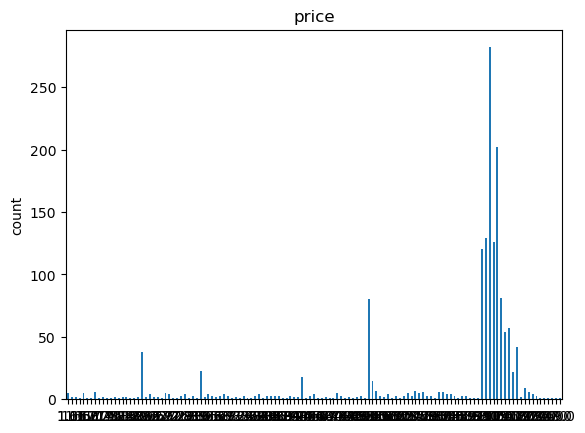

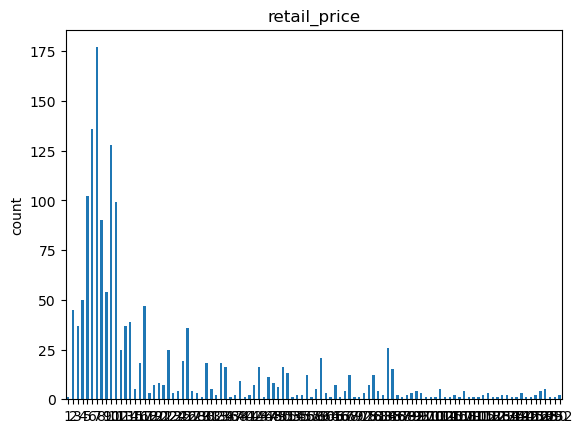

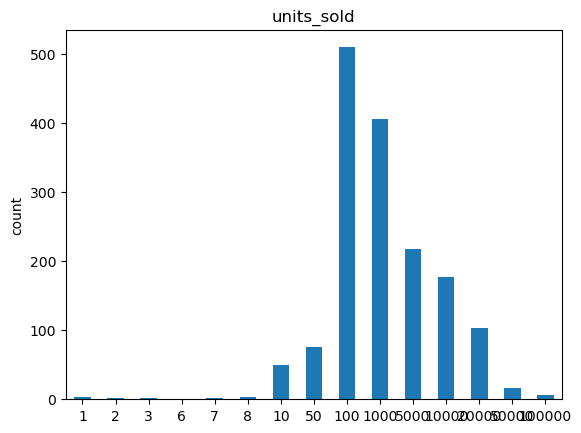

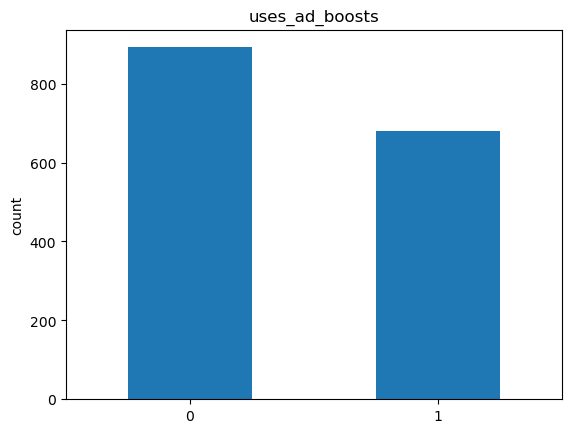

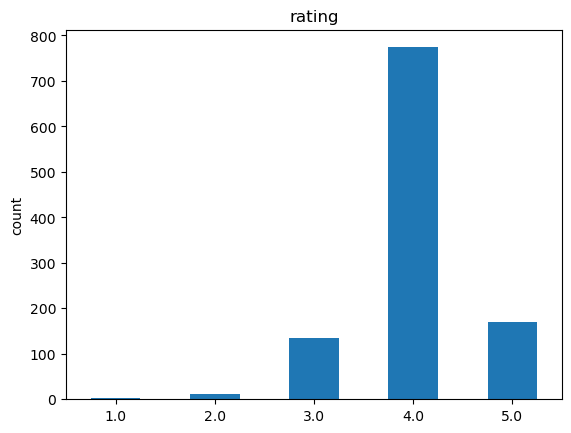

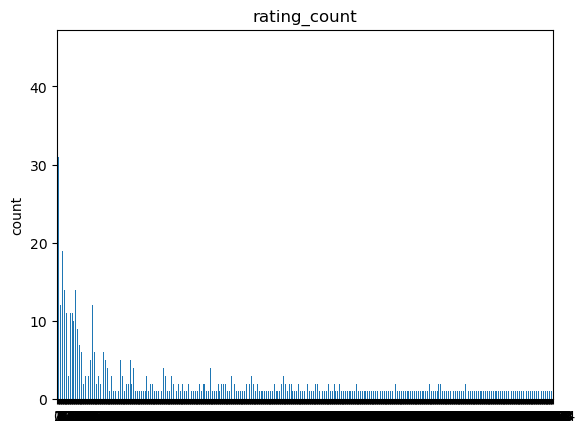

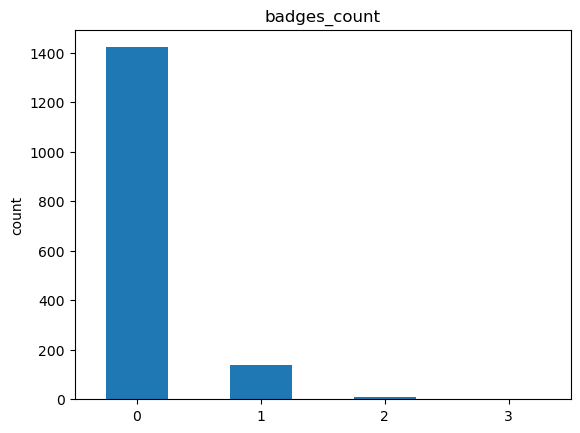

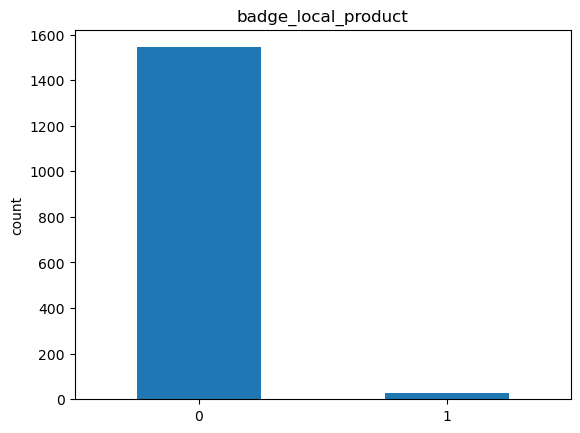

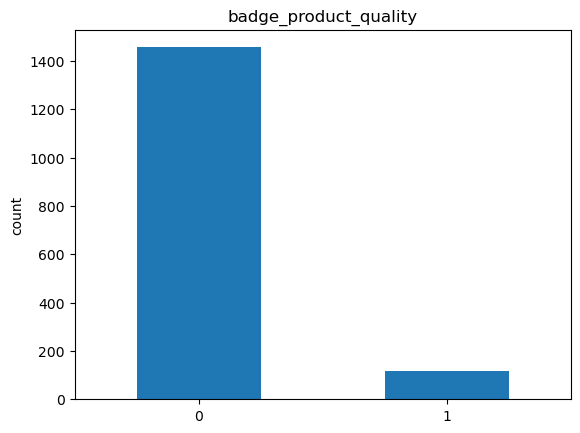

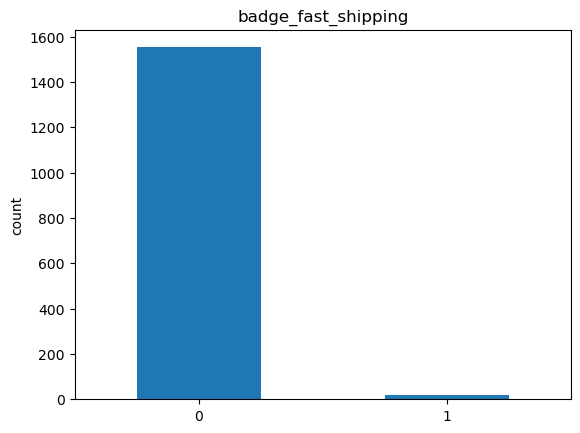

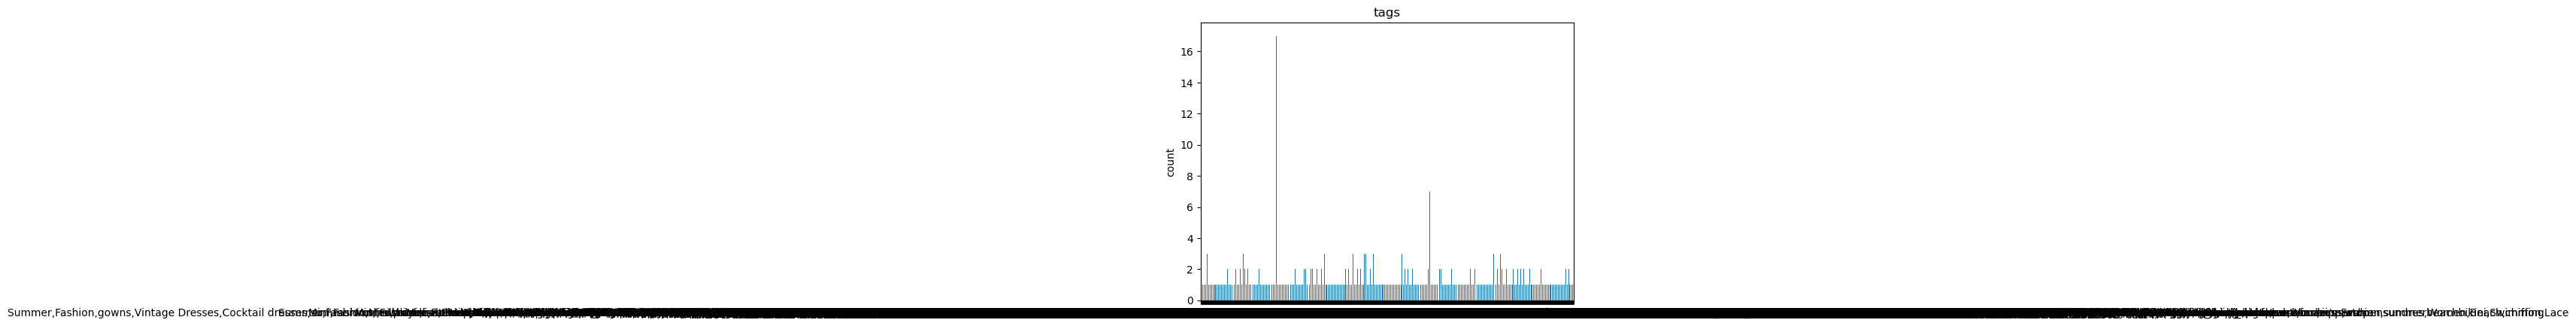

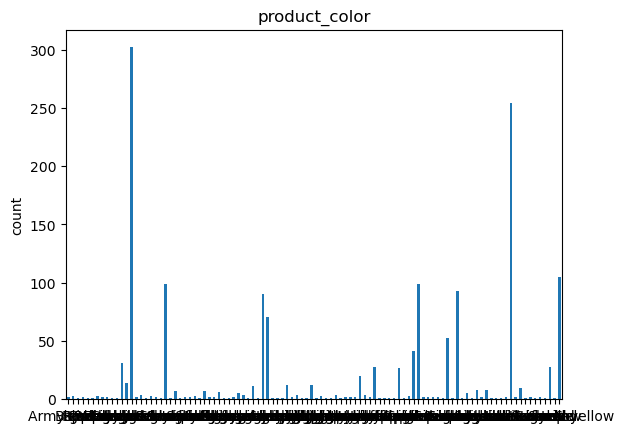

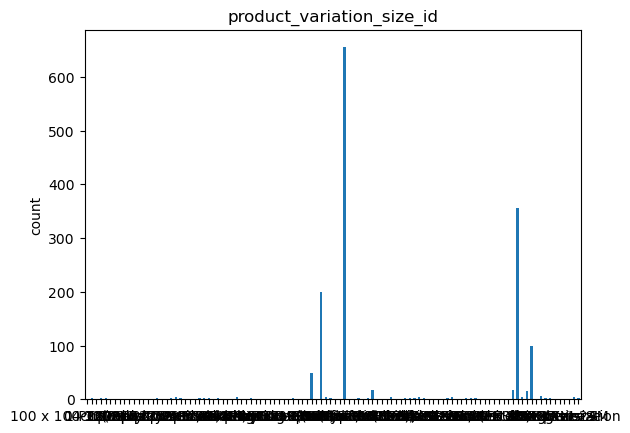

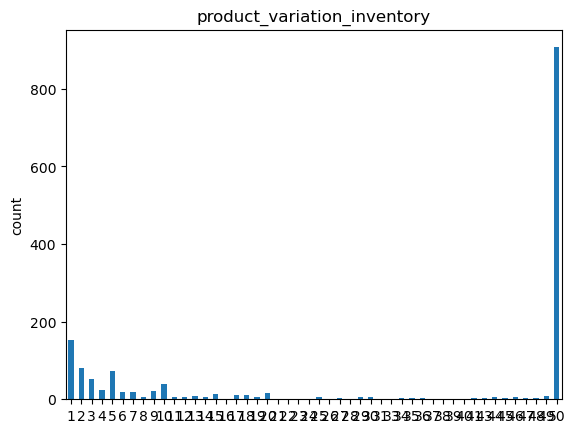

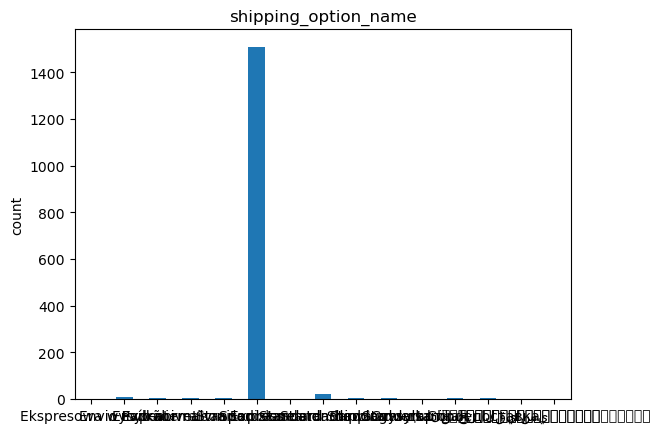

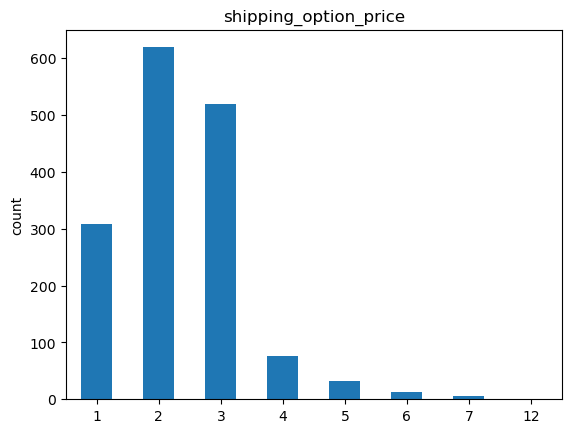

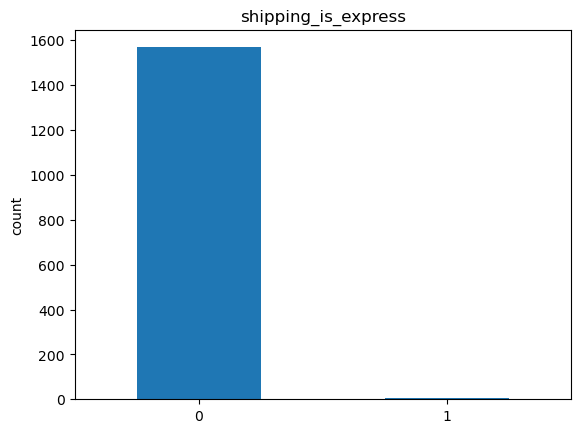

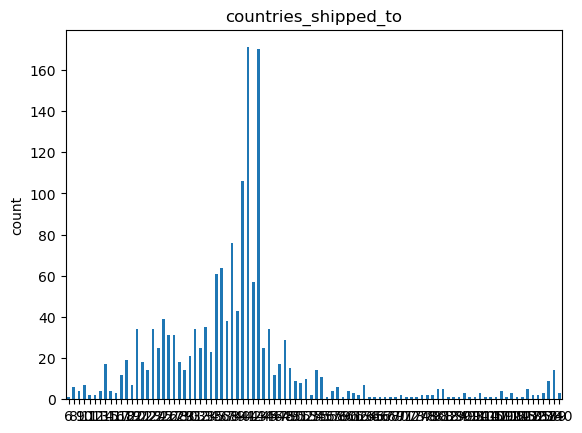

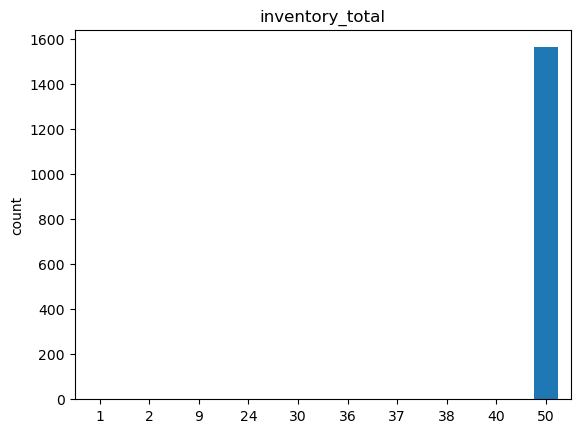

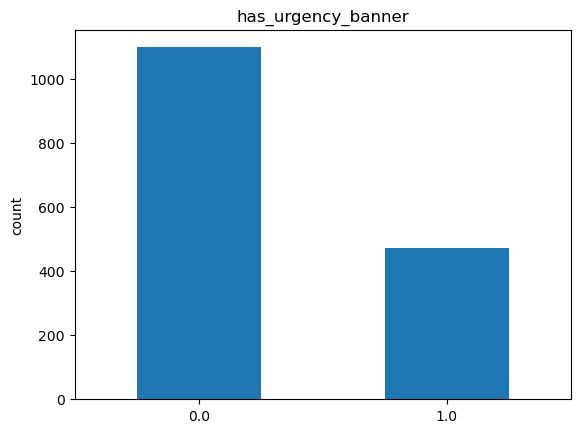

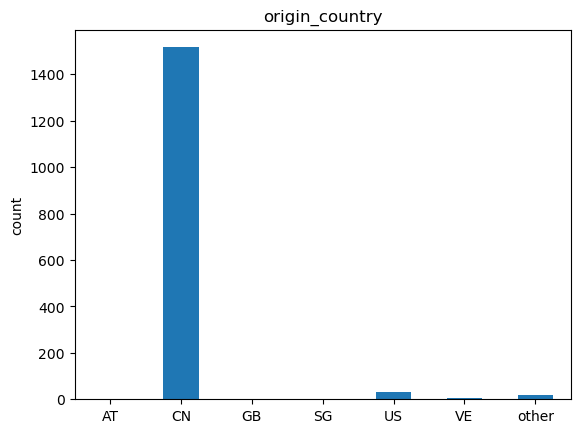

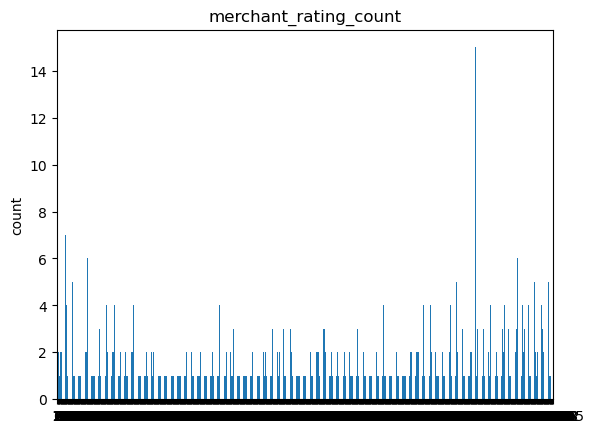

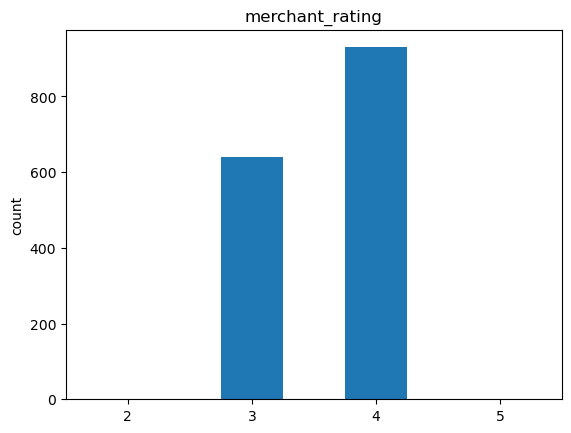

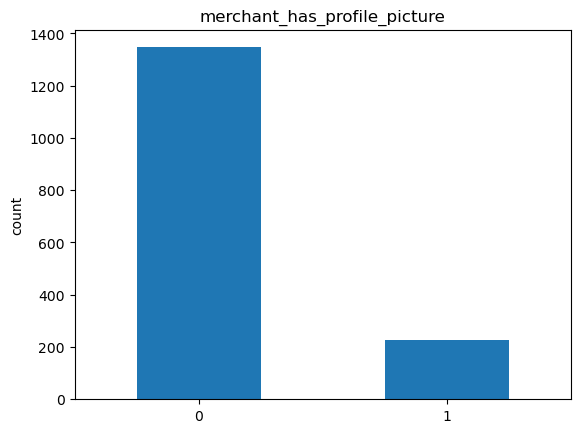

In [14]:
for col in df:
    df[col].value_counts().sort_index().plot(kind='bar', rot=0, ylabel='count', title=col)
    plt.show()

In [15]:
scaler = MinMaxScaler()
#extract integer columns
intcol = df.select_dtypes(include='int64').columns
#normlize integer columns
df[intcol] = scaler.fit_transform(df[intcol])
#normalize float columns
df[['price']] = scaler.fit_transform(df[['price']])

In [16]:
vect = CountVectorizer(stop_words=ENGLISH_STOP_WORDS)

#get words
vect.fit(df['tags'])

#Transform tags to vectors
train = vect.fit_transform(df['tags'])
train.toarray()
#convert to dataframe
data = pd.DataFrame(train.toarray(), columns=vect.get_feature_names())

In [17]:
df = pd.concat([df.drop(['tags'],axis=1),data], axis=1, join='inner')
df.head()

price  retail_price  units_sold  uses_ad_boosts  rating  \
272   0.145833      0.023904    0.099991             1.0     4.0   
1515  0.145833      0.023904    0.009990             0.0     4.0   
940   0.104167      0.131474    0.000990             0.0     4.0   
309   0.076458      0.011952    0.000990             1.0     3.0   
226   0.145833      0.039841    0.009990             0.0     4.0   

      rating_count  badges_count  badge_local_product  badge_product_quality  \
272       0.080505      0.000000                  0.0                    0.0   
1515      0.040638      0.333333                  1.0                    0.0   
940       0.000482      0.000000                  0.0                    0.0   
309       0.003953      0.000000                  0.0                    0.0   
226       0.006122      0.000000                  0.0                    0.0   

      badge_fast_shipping product_color product_variation_size_id  \
272                   0.0        yellow                         M   
1515                  0.0         black                         L   
940                   0.0         white                         L   
309                   0.0      lakeblue                        XS   
226                   0.0       apricot                         S   

      product_variation_inventory shipping_option_name  shipping_option_price  \
272                      1.000000   Livraison standard               0.181818   
1515                     1.000000   Livraison standard               0.181818   
940                      1.000000   Livraison standard               0.090909   
309                      0.081633   Livraison standard               0.000000   
226                      1.000000   Livraison standard               0.181818   

      shipping_is_express  countries_shipped_to  inventory_total  \
272                   0.0              0.179104              1.0   
1515                  0.0              0.231343              1.0   
940                   0.0              0.261194              1.0   
309                   0.0              0.141791              1.0   
226                   0.0              0.067164              1.0   

      has_urgency_banner origin_country  merchant_rating_count  \
272                  0.0             CN               0.030644   
1515                 0.0             CN               0.011841   
940                  0.0             CN               0.001792   
309                  0.0             CN               0.003447   
226                  1.0             CN               0.000080   

      merchant_rating  merchant_has_profile_picture  2014menshort  \
272                 4                           1.0             0   
1515                4                           0.0             0   
940                 3                           0.0             0   
309                 4                           0.0             0   
226                 4                           0.0             0   

      2014summermenshort  2018fashion  2in1short  2in1sportsjogging  \
272                    0            0          0                  0   
1515                   0            0          0                  0   
940                    0            0          0                  0   
309                    0            0          0                  0   
226                    0            0          0                  0   

      2piecebathingsuit  2piecesbikini  2pieceset  34pant  34sleeve  \
272                   0              0          0       0         0   
1515                  0              0          0       0         0   
940                   0              0          0       1         0   
309                   0              0          0       0         0   
226                   0              0          0       0         0   

      34sleevedres  3d  3dprint  3dprintedtshirt  3dprinttshirt  3mreflective  \
272              0   0        0                0             

In [18]:
#categorical columns
features = ["product_variation_size_id","shipping_option_name",'product_color','origin_country']

df = pd.get_dummies(df, columns = features)

In [19]:
print(df1.shape)
print(df2.shape)

(1094, 33)
(479, 32)


In [20]:
train=df[df["rating"].notna()]
test=df[df["rating"].isna()]

In [21]:
test=test.drop(['rating'], axis=1)

In [22]:
print(train.shape)
print(test.shape)

(1094, 2316)
(479, 2315)


In [23]:
X_train, X_test, y_train, y_test = train_test_split(train.drop(['rating'], axis=1),train.rating,test_size= 0.1,random_state=1,stratify=train.rating)

In [24]:
print(X_train.shape)
print(X_test.shape)

(984, 2315)
(110, 2315)


In [25]:
print(y_train.shape)
print(y_test.shape)

(984,)
(110,)


* average=micro says the function to compute f1 by considering total true positives, false negatives and false positives (no matter of the prediction for each label in the dataset)
* average=macro says the function to compute f1 for each label, and returns the average without considering the proportion for each label in the dataset.
* average=weighted says the function to compute f1 for each label, and returns the average considering the proportion for each label in the dataset.
* average=samples says the function to compute f1 for each instance, and returns the average. Use it for multilabel classification

since our data is inbalanced i will use micro

In [26]:
NBclf = MultinomialNB(alpha = 0.5).fit(X_train, y_train)
print(metrics.f1_score(NBclf.predict(X_test),y_test, average='micro'))

0.6545454545454545


In [27]:
svm1 = SVC().fit(X_train, y_train)
print(metrics.f1_score(svm1.predict(X_test),y_test, average='micro'))

0.7090909090909091


In [28]:
param1 = {}
param1['C'] = [10**-2, 10**-1, 10**0, 10**1, 10**2]
param1['kernel'] = ['linear', 'poly','rbf', 'sigmoid']
param1['gamma'] = [0.5,0.1,1]
model_svm_2 = SVC(probability=True)
svm2 = GridSearchCV(estimator=model_svm_2, param_grid= param1, cv=5, n_jobs=-1, verbose=3, scoring='f1_micro').fit(X_train, y_train)
print("Best parameter for SVM" )
svm2.best_params_

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best parameter for SVM


{'C': 0.1, 'gamma': 0.5, 'kernel': 'linear'}

In [29]:
print(metrics.f1_score(svm2.predict(X_test),y_test, average='micro'))

0.7090909090909091


In [30]:
dt1 = DecisionTreeClassifier().fit(X_train, y_train)
print(metrics.f1_score(dt1.predict(X_test),y_test, average='micro'))

0.7090909090909091


In [31]:
param2 = {}
param2['max_depth'] = [2, 3, 5, 10, 20,25,None]
param2['min_samples_split'] = [5, 10, 20, 50, 100]
param2['min_samples_leaf'] = [2, 3, 5, 10, 20,25,None]
param2['criterion'] = ["entropy", "gini"]

dt2 = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid= param2, cv=5, n_jobs=-1, verbose=3, scoring='f1_micro').fit(X_train, y_train)
print("Best parameter for dt" )
dt2.best_params_

Fitting 5 folds for each of 490 candidates, totalling 2450 fits
Best parameter for dt


{'criterion': 'entropy',
 'max_depth': 3,
 'min_samples_leaf': 2,
 'min_samples_split': 50}

In [32]:
print(metrics.f1_score(dt2.predict(X_test),y_test, average='micro'))

0.7909090909090909


In [36]:
finaldt1 = DecisionTreeClassifier(max_depth = 3, min_samples_leaf = 5, min_samples_split = 50, criterion = 'entropy').fit(train.drop(['rating'], axis=1), train.rating)
print(metrics.f1_score(finaldt1.predict(X_test),y_test, average='micro'))

0.7909090909090909


i think we have a winner after i found the best model for my data i will train it with the whole data instead of the splittied small data so it get even better 

feels good :)

nw its time to preproccess the test data like i did with training data  ik that is not efficient and i will repeat the code but i wish i have more time 

feels bad :(

In [38]:
pred_test = finaldt1.predict(test)

pred_df = pd.DataFrame(data={'id': test.index, 'rating': pred_test})
pred_df.to_csv("Dt_final_final_final.csv",index=False)